In [3]:
# -*- coding: utf-8 -*-


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import misc
from datetime import datetime
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.io import loadmat
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import copy
from matplotlib import cm
from matplotlib.animation import FuncAnimation
import scipy.optimize
import networkx as nx
import os
from sklearn import svm
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import fcluster
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from scipy import stats
import math

# remove random
np.random.seed(42)

In [4]:
# task 1

# Загрузите данные ex9_movies.mat из файла.

data = loadmat("G:/Labs/bsuir-labs/11cem/ml/lab09/data/ex9_movies.mat")

R_is_rated = data["R"]
Y_rate_value = data["Y"]

new_R = []
for film in R_is_rated:
    f = list(film)
    f.append(0)
    new_R.append(f)

new_Y = []
for film in Y_rate_value:
    # normalizing
    f = list(film/5)
    f.append(0)
    new_Y.append(f)

In [5]:
# task 8
# Добавьте несколько оценок фильмов от себя. Файл movie_ids.txt содержит индексы каждого из фильмов.

my_rating =[
[0, 4],
[49, 4],
[61, 5],
[68, 5],
[71, 4],
[81, 2],
[88, 3],
[93, 5],
[94, 4],
[95, 4],
[186, 5],
[154, 4],
[241, 3],
[249, 5],
[256, 4],
[258, 5],
[312, 4],
[342, 4],
[404, 3],
[567, 4],
[1158, 4]
]
for keipa_film in my_rating:
    new_R[keipa_film[0]][-1] = 1
    new_Y[keipa_film[0]][-1] = keipa_film[1]/5

R_is_rated = np.array(new_R)
Y_rate_value = np.array(new_Y)



# 0 - means no rated
# rows - movies 1682
# colums - users 943


# rmse
# sqrt(1/N*sum((ypred-ypred)**2))

In [6]:
# идея
# похожим пользователям нравятся похожие объекты
# вычисляется не по контенту, а по истории оценок
# минусы - холодный старт
# плюсы работет лучше чем content base

# task 3
# Реализуйте функцию стоимости для алгоритма.

def cost(x_features, thetha_favs, y, lambda_=10.):
    p1 = .5*(np.sum((x_features.T.dot(thetha_favs)-y)**2))
    p2 = .5*lambda_*(np.sum(x_features**2))
    p3 = .5 * lambda_*(np.sum(thetha_favs**2))
    return p1+p2+p3


c:\users\harwister\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':
c:\users\harwister\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


iteration: 169


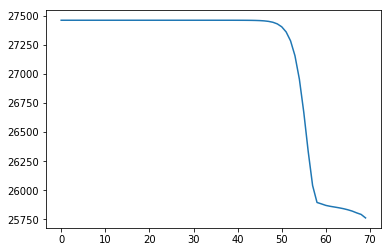

best c:25762.73


In [7]:
def ret(opt_x, opt_th, c):
    print("best c:{}".format(round(c, 2)))
    return opt_x, opt_th, c

# task 2
# Выберите число признаков фильмов (n) для реализации алгоритма коллаборативной фильтрации.
# features=2

# task 5
# При реализации используйте векторизацию для ускорения процесса обучения.

# task 7
# Обучите модель с помощью градиентного спуска или других методов оптимизации.

def grad(y, iterations=250,alpha=.000001, lambda_=-0.1, features=2, minimizing_rand = 100000000):
    n = features
    x_features = np.vstack((np.zeros(R_is_rated.shape[0]), np.random.rand(n, R_is_rated.shape[0]) / minimizing_rand))
    thetha_favs = np.vstack((np.zeros(R_is_rated.shape[1]), np.random.rand(n, R_is_rated.shape[1]) / minimizing_rand))
    best_cost = np.inf
    opt_theta = thetha_favs
    opt_x = x_features
    cost_history = []
    for i in range(iterations):
        # task 4
        # Реализуйте функцию вычисления градиентов.
        # task 6
        # Добавьте L2-регуляризацию в модель.
        x_features -= alpha*(np.sum((x_features.T.dot(thetha_favs)-y).dot(thetha_favs.T)))+lambda_*x_features
        thetha_favs -= alpha*(np.sum(x_features.dot(x_features.T.dot(thetha_favs)-y)))+lambda_*thetha_favs
        c = cost(x_features, thetha_favs, y, lambda_)
        # print(c)
        if np.isinf(c) or np.isnan(c):
            print("iteration: {}".format(i))
            break
        if c < best_cost:
            best_cost = c
            opt_theta = thetha_favs
            opt_x = x_features
            cost_history.append(c)
    plt.plot(cost_history)
    plt.show()
    return ret(opt_x, opt_theta, best_cost)


x_features, thetha_favs, c = grad(Y_rate_value)
# optimize these twos ^^

# task 9
# Сделайте рекомендации для себя. Совпали ли они с реальностью?
predictions = x_features.T.dot(thetha_favs)[:,-1]
# нет


In [12]:
# remove random
np.random.seed(42)
# task 1

# Загрузите данные ex9_movies.mat из файла.

data = loadmat("G:/Labs/bsuir-labs/11cem/ml/lab09/data/ex9_movies.mat")

R_is_rated = data["R"]
Y_rate_value = data["Y"]

new_R = []
for film in R_is_rated:
    f = list(film)
    f.append(0)
    new_R.append(f)

new_Y = []
for film in Y_rate_value:
    # normalizing
    f = list(film/5)
    f.append(0)
    new_Y.append(f)


# task 8
# Добавьте несколько оценок фильмов от себя. Файл movie_ids.txt содержит индексы каждого из фильмов.

my_rating =[
[0, 4],
[49, 4],
[61, 5],
[68, 5],
[71, 4],
[81, 2],
[88, 3],
[93, 5],
[94, 4],
[95, 4],
[186, 5],
[154, 4],
[241, 3],
[249, 5],
[256, 4],
[258, 5],
[312, 4],
[342, 4],
[404, 3],
[567, 4],
[1158, 4]
]
for keipa_film in my_rating:
    new_R[keipa_film[0]][-1] = 1
    new_Y[keipa_film[0]][-1] = keipa_film[1]/5

R_is_rated = np.array(new_R)
Y_rate_value = np.array(new_Y)



from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, n_iter=250, random_state=42)
thetas = svd.fit_transform(Y_rate_value)
xes = svd.components_
# task 10
#  Также обучите модель с помощью сингулярного разложения матриц. Отличаются ли полученные результаты?

predictions = thetas.dot(xes)[:,-1]
print(predictions[:100])
# отличаются в лучшую сторону
# модель угадывает



[ 0.13088011  0.05686316  0.03427151  0.05914016  0.03538836 -0.00267455
  0.10547822  0.04564172  0.05156982  0.00276461  0.08491869  0.0731509
  0.0213617  -0.00016555  0.08197689  0.00439385  0.03831225 -0.00102441
 -0.00149863  0.00240206  0.02527148  0.10199943  0.00791562  0.0665706
  0.07485748  0.0090972   0.02662504  0.08171655  0.0465065  -0.00746953
  0.06154591 -0.00185392  0.04211257  0.00296274  0.00341958  0.00345738
  0.00061181  0.05458405  0.0263796   0.01831119  0.02264889  0.04288833
  0.01761976  0.02353806 -0.00461245  0.00349166  0.01718963  0.01726875
  0.03484997  0.15076893  0.03346399  0.00039558  0.03904733  0.04867284
  0.05373545  0.09474005 -0.00165325  0.03597847 -0.00720251 -0.00487802
 -0.00330435  0.05839572  0.03726224  0.07509207  0.02490634  0.05622838
  0.04710022  0.06602691  0.08990757  0.04715057  0.07792102  0.04468844
  0.04908587  0.00059597  0.00230324  0.01530505  0.05268048  0.01425666
  0.10401899  0.02815158  0.02106698  0.09705004  0.0